In [ ]:
!pip3 install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import numpy as np


In [ ]:
def imshow(img):
  img=img/2+0.5 #unnormalize
  nping=img.numpy()
  plt.imshow(np.transpose(nping,(1,2,0)))
  plt.show

In [ ]:
transform=transforms.Compose([
    transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [ ]:
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
shuffle=False, num_workers=2)
classes = (' plane' , 'car' , 'bird' , 'cat',
'deer', 'dog' , 'frog', 'horse' , 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
device=torch.device('cuda:0')
print(device)
net.to(device)

cuda:0


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim
criterion=nn.CrossEntropyLoss()
print(list(net.parameters()
))

[Parameter containing:
tensor([[[[-7.6032e-02, -9.4464e-02, -6.6326e-02, -5.6731e-02, -1.0514e-01],
          [-1.0970e-01,  9.7830e-02, -5.5910e-02, -5.6183e-02,  9.3867e-03],
          [ 1.5780e-02, -4.0341e-02, -7.9707e-03, -8.0550e-03, -6.1307e-02],
          [-9.2481e-02, -8.5759e-02,  1.0257e-01,  5.9075e-02, -5.1174e-02],
          [-2.5131e-03, -7.1709e-02, -6.5724e-02, -7.5979e-02,  4.8150e-02]],

         [[-6.6344e-02, -3.1727e-03,  1.4291e-02, -8.9789e-02,  3.3856e-02],
          [ 1.8553e-02, -4.2198e-02,  8.2656e-02, -6.3160e-02, -6.6757e-02],
          [-6.3713e-02, -3.8781e-02,  7.8488e-02, -6.0415e-03, -8.0165e-02],
          [-7.4765e-02, -1.0942e-01, -3.3859e-02, -4.4728e-02,  7.5543e-02],
          [-2.3173e-02,  4.1909e-02, -7.4780e-02,  3.0863e-02,  1.9175e-05]],

         [[-3.0638e-02, -1.7661e-02,  9.2166e-02,  7.2765e-02,  7.8370e-02],
          [ 6.3869e-02,  8.4385e-02,  6.0913e-02, -7.9341e-02, -1.9008e-02],
          [ 7.6096e-02, -1.2523e-03,  1.0408e-01,

In [ ]:

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2): #loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
  # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data[0].to(device), data[1].to(device)
    #zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    #print statistics
    running_loss += loss.item()
    if i% 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i +1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss=0.0
print("Finished---------------------")

[1,  2000] loss: 2.237
[1,  4000] loss: 1.891
[1,  6000] loss: 1.675
[1,  8000] loss: 1.607
[1, 10000] loss: 1.552
[1, 12000] loss: 1.506
[2,  2000] loss: 1.414
[2,  4000] loss: 1.401
[2,  6000] loss: 1.327
[2,  8000] loss: 1.303
[2, 10000] loss: 1.302
[2, 12000] loss: 1.272
Finished---------------------


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

GroundTruth:  cat   ship  ship   plane


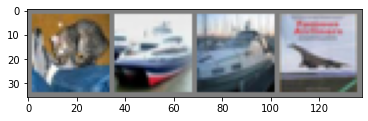

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   car    plane


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %
